# Keltner Channel

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import useful_functions as uf
import classification_report_generator as crg
from ta.volatility import KeltnerChannel

In [21]:
df = pd.read_csv("../data/BTCUSDT-hour-target.csv")

## Variations and default correlations

In [22]:
def variations(windows:list[int]):
    """
    returns variations of atr indicator with given windows
    """
    name = "kc_"
    for w in windows:
        end = str(w)
        kc = KeltnerChannel(df.high, df.low, df.close, window=w)
#         df[name + "hband_i_" + end] = kc.keltner_channel_hband_indicator()
#         df[name + "lband_i_" + end] = kc.keltner_channel_lband_indicator()
        df[name + "pband_" + end] = kc.keltner_channel_pband()
        df[name + "wband_" + end] = kc.keltner_channel_wband()

In [23]:
variations([10, 20, 50, 100, 200])

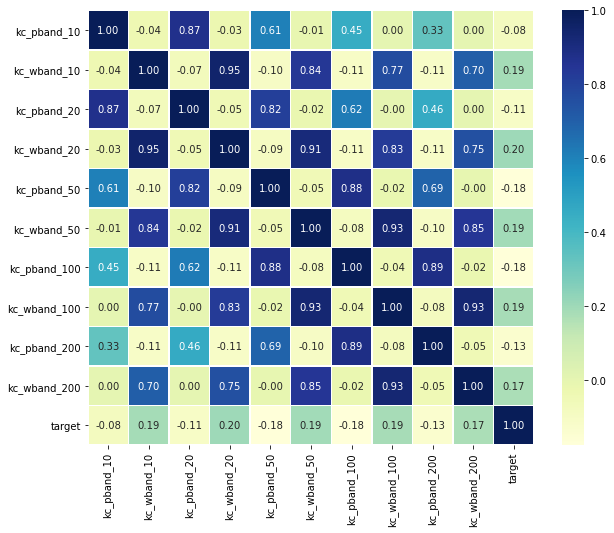

In [24]:
indicators = list(df.columns)[13:]
indicators.append("target")

d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

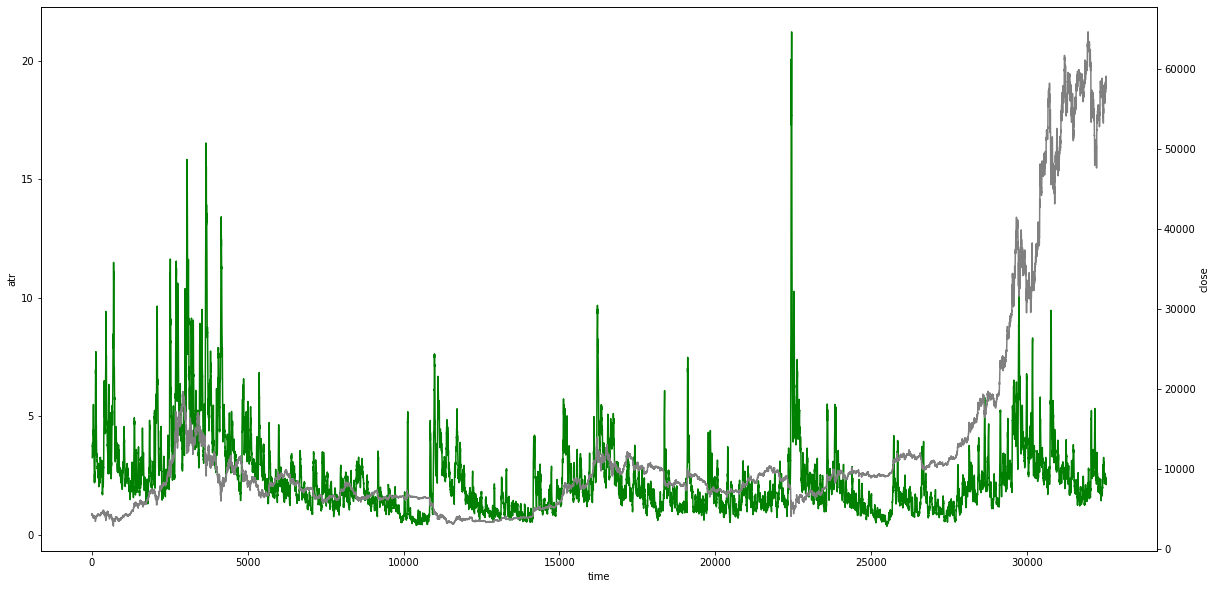

In [12]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(df.kc_wband_20,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(df.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

## pband 50 analysis

In [25]:
dplot = df[["kc_pband_50"]].copy()
dplot["kc_pband_50_rate"] = uf.get_rate(dplot.kc_pband_50)

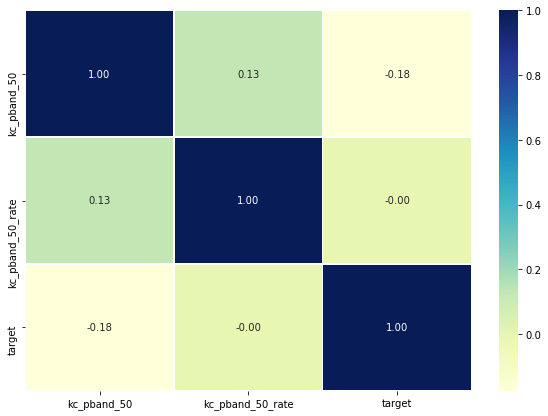

In [26]:
d = dplot.copy()
d["target"] = df.target
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

## wband 20 analysis 

In [27]:
dplot = df[["kc_wband_20"]].copy()
dplot["kc_wband_20_log"] = list(map(lambda x: np.log(x), dplot.kc_wband_20))
dplot["kc_wband_20_rate"] = uf.get_rate(dplot.kc_wband_20)

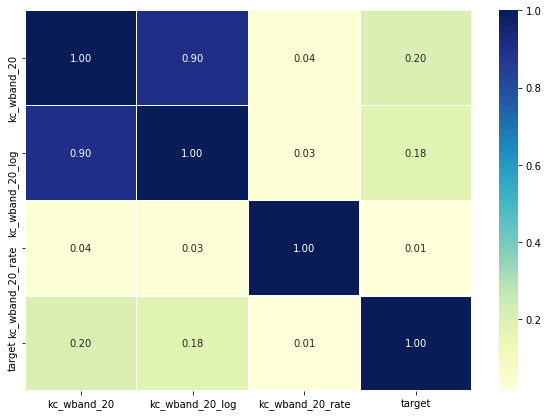

In [28]:
d = dplot.copy()
d["target"] = df.target
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

## Conclusion
wband 20 and pband 50